## Практическое задание 3. L2 приближение функций

In [1]:
import numpy as np
from numpy import log, sqrt
import time
from matplotlib import pyplot as plt

In [2]:
def calculate_a(a, X):
    Y = []
    for x in X:
        Y.append(a[0] +
                 a[1] * np.log(x) +
                 a[2] / (x * x) +
                 a[3] / x +
                 a[4] * x +
                 a[5] * x * x +
                 a[6] * x ** 3)
    return Y


def calculate_b(b, X):
    Y = []
    for x in X:
        Y.append(b[0] +
                 b[1] * x +
                 b[2] * np.sqrt(x) +
                 b[3] * x * x +
                 b[4] * x ** 3 +
                 b[5] * x ** 4 +
                 b[6] * x ** 6)
    return Y

In [3]:
def get_gramm_integrals(x):
    S = np.array([[x, x**2/2, 2/3*x**(3/2),       x**3/3,       x**4/4,         x**5/5,         x**7/7],
                  [0, x**3/3, 2/5*x**(5/2),       x**4/4,       x**5/5,         x**6/6,         x**8/8],
                  [0,      0,       x**2/2, 2/7*x**(7/2), 2/9*x**(9/2), 2/11*x**(11/2), 2/15*x**(15/2)],
                  [0,      0,            0,       x**5/5,       x**6/6,         x**7/7,         x**9/9],
                  [0,      0,            0,            0,       x**7/7,         x**8/8,       x**10/10],
                  [0,      0,            0,            0,            0,         x**9/9,       x**11/11],
                  [0,      0,            0,            0,            0,              0,       x**13/13]])
    S += np.triu(S, 1).T
    return S

def get_res_integrals(x, a):
    t = np.array([[     x,            x*log(x)-x,        -1/x, log(abs(x)), x**2/2, x**3/3,   x**4/4],
                  [x**2/2,  log(x)*x**2/2-x**2/4, log(abs(x)),           x, x**3/3, x**4/4,   x**5/5],
                  [2/3*x*sqrt(x), 2/3*x*sqrt(x)*log(x)-4/9*x*sqrt(x), -sqrt(x)/x-1/sqrt(x), 2*sqrt(x), 2/5*x**2*sqrt(x), 2/7*x**3*sqrt(x), 2/9*x**4*sqrt(x)],
                  [x**3/3,  log(x)*x**3/3-x**3/9,           x,      x**2/2, x**4/4, x**5/5,   x**6/6],
                  [x**4/4, log(x)*x**4/4-x**4/16,      x**2/2,      x**3/3, x**5/5, x**6/6,   x**7/7],
                  [x**5/5, log(x)*x**5/5-x**5/25,      x**3/3,      x**4/4, x**6/6, x**7/7,   x**8/8],
                  [x**7/7, log(x)*x**7/7-x**7/49,      x**5/5,      x**6/6, x**8/8, x**9/9, x**10/10]])
    return t.dot(a)
    

def approxiamtion(a, xl, xr):
    Sl = get_gramm_integrals(xl)
    Sr = get_gramm_integrals(xr)
    S = Sr - Sl
    tl = get_res_integrals(xl, a)
    tr = get_res_integrals(xr, a)
    t = tr - tl
    return np.linalg.solve(S, t)


In [4]:
a = np.random.randint(1, 10, 7)
print(a)

def experiment(xl, xr):
    b = approxiamtion(a, xl, xr)
    X = np.linspace(xl, xr, 100)
    A = calculate_a(a, X)
    B = calculate_b(b, X)
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(121)
    plt.plot(X, A)
    plt.plot(X, B)
    plt.title('$L_2$ approximation')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(['$f$', 'Approx'])
    
    plt.subplot(122)
    plt.title('Difference')
    plt.xlabel('$x$')
    plt.ylabel('diff')
    plt.plot(X, np.array(A) - np.array(B))

[5 4 3 9 7 1 4]


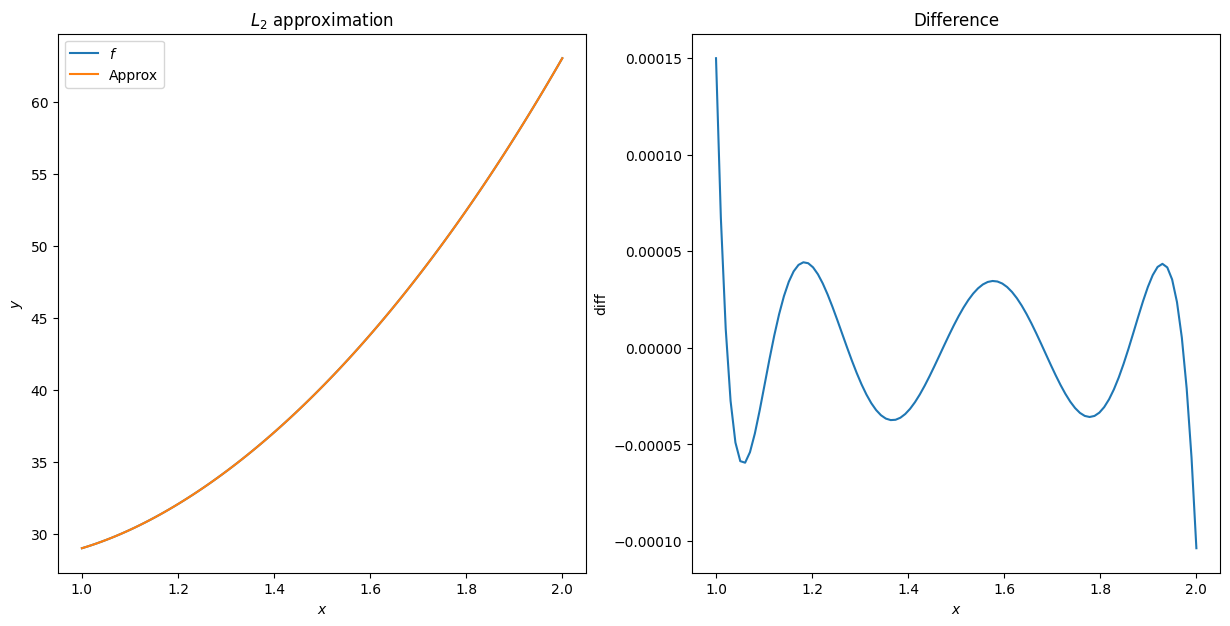

In [5]:
experiment(1, 2)

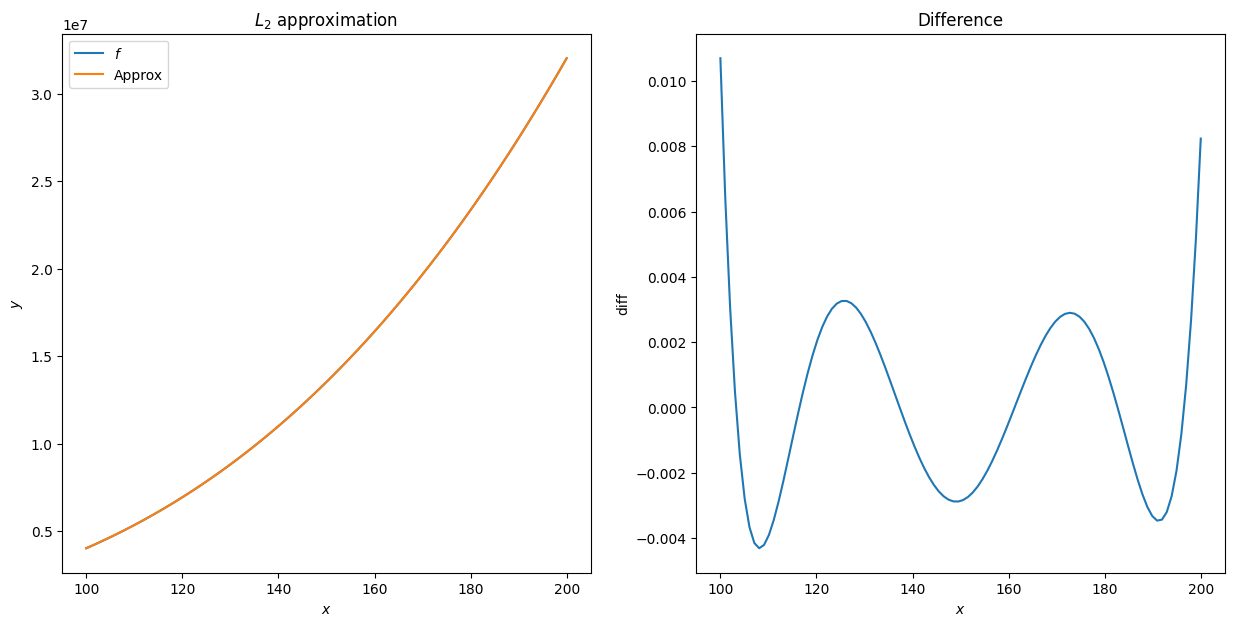

In [6]:
experiment(100, 200)

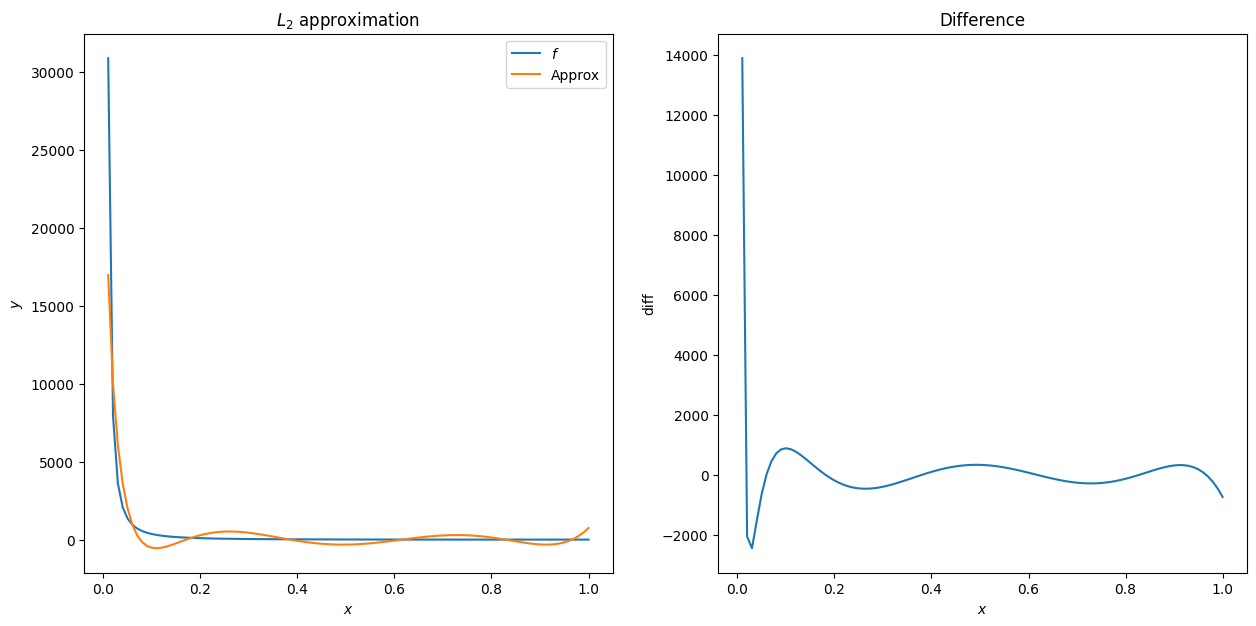

In [8]:
experiment(0.01, 1)